In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# 데이터 로드
df = pd.read_csv('housingdata.csv')

# 1. 결측치 처리
# 수치형 결측치는 평균으로 대체
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 2. 이상치 처리 (IQR을 사용하여 이상치 제거)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 벗어난 값을 NaN으로 처리 후 결측치 재처리
for col in numerical_cols:
    df[col] = df[col].mask((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]))

# 다시 평균값으로 대체
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 3. 훈련 데이터 생성
# 종속 변수(Y)를 MEDV로 설정
target_column = 'MEDV'
if target_column in df.columns:
    X = df.drop(columns=[target_column])
    y = df[target_column]
else:
    raise ValueError(f"'{target_column}' 컬럼이 데이터프레임에 없습니다.")

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 출력
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("선형 회귀 결과:")
print(f"RMSE: {lr_rmse:.2f}, R^2: {lr_r2:.2f}")

# 2. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("\n랜덤 포레스트 결과:")
print(f"RMSE: {rf_rmse:.2f}, R^2: {rf_r2:.2f}")

# 3. 결정 트리 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print("\n결정 트리 결과:")
print(f"RMSE: {dt_rmse:.2f}, R^2: {dt_r2:.2f}")


선형 회귀 결과:
RMSE: 3.45, R^2: 0.64

랜덤 포레스트 결과:
RMSE: 2.68, R^2: 0.79

결정 트리 결과:
RMSE: 3.48, R^2: 0.64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 로드
df = pd.read_csv('housingdata.csv')

# 1. 결측치 컬럼값 대체
df['CRIM']  = df['CRIM'].fillna(df['CRIM'].median())
df['ZN']    = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['CHAS']  = df['CHAS'].fillna(0)
df['AGE']   = df['AGE'].fillna(df['AGE'].median())
# df["LSTAT"] = df['LSTAT'].fillna(0)

# 2. LSTAT 컬럼 결측값 예측을 통한 대체
df_with_na = df[df['LSTAT'].isnull()]
df_without_na = df[df['LSTAT'].notnull()]

# LSTAT과 상관관계 높은 컬럼 선택 (>= 0.5)
lstat_correlated_features = ['INDUS', 'NOX', 'AGE', 'TAX']

# 회귀 모델 학습
lr = LinearRegression()
X_train_lstat = df_without_na[lstat_correlated_features]
y_train_lstat = df_without_na["LSTAT"]
lr.fit(X_train_lstat, y_train_lstat)

# 결측값 예측
X_pred = df_with_na[lstat_correlated_features]
lstat_predicted_values = lr.predict(X_pred)

# 예측값으로 결측값 대체
df.loc[df["LSTAT"].isnull(), "LSTAT"] = lstat_predicted_values

# 3. 컬럼 삭제
df = df.drop(['ZN', 'CHAS', 'AGE', 'TAX', 'B'], axis=1)

# MEDV와 상관관계 높은 컬럼 선택 (>= 0.5)
medv_correlated_features = ['INDUS', 'NOX', 'RM', 'LSTAT']
# medv_correlated_features = ['RM', 'LSTAT']

X = df[medv_correlated_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("선형 회귀 결과:")
print(f"RMSE: {lr_rmse:.2f}, R^2: {lr_r2:.2f}")

# 2. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print("\n랜덤 포레스트 결과:")
print(f"RMSE: {rf_rmse:.2f}, R^2: {rf_r2:.2f}")

# 3. 결정 트리 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print("\n결정 트리 결과:")
print(f"RMSE: {dt_rmse:.2f}, R^2: {dt_r2:.2f}")

선형 회귀 결과:
RMSE: 5.57, R^2: 0.58

랜덤 포레스트 결과:
RMSE: 3.73, R^2: 0.81

결정 트리 결과:
RMSE: 5.73, R^2: 0.55


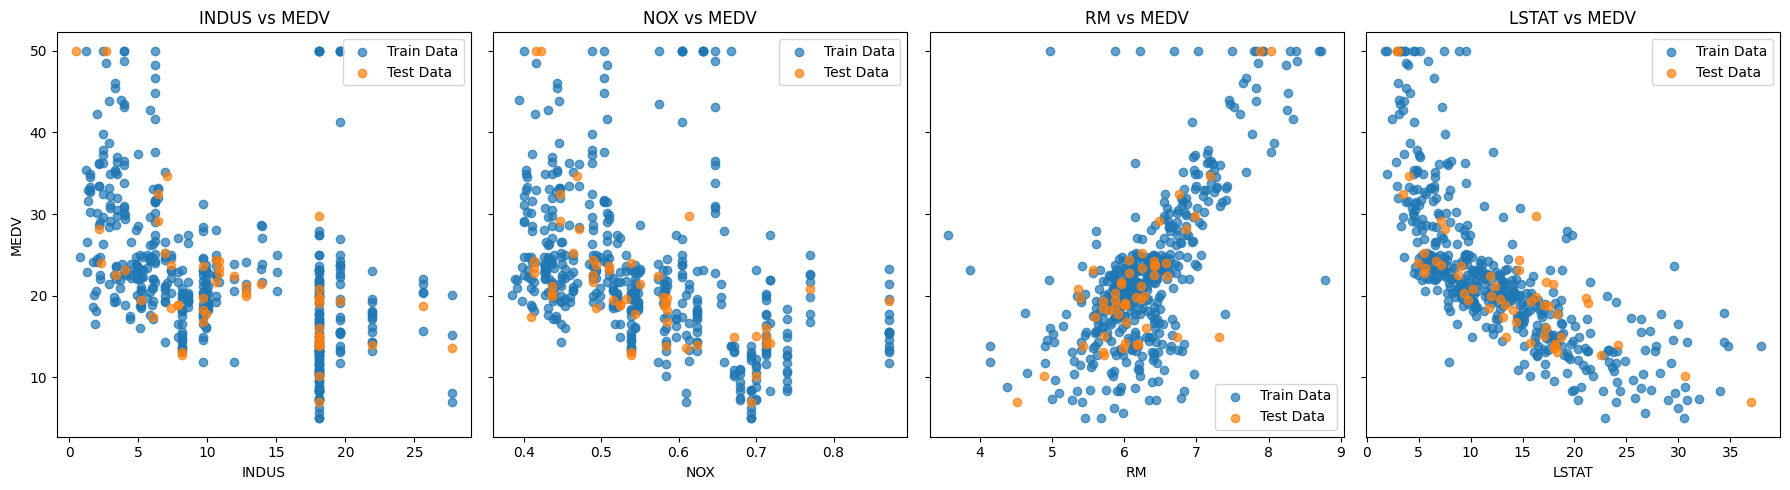

In [5]:
num_features = len(medv_correlated_features)

# 서브플롯 생성
fig, axes = plt.subplots(1, num_features, figsize=(18, 5), sharey=True)  # 1행 num_features열 서브플롯

for i, feature in enumerate(medv_correlated_features):
    # 현재 컬럼의 데이터와 범위 설정
    x_train = X_train[feature]
    x_test = X_test[feature]
    x_range = np.linspace(x_train.min(), x_train.max(), 100)

    # 산점도: 훈련 데이터와 테스트 데이터
    axes[i].scatter(x_train, y_train, label="Train Data", alpha=0.7)
    axes[i].scatter(x_test, y_test, label="Test Data", alpha=0.7)

    # 서브플롯 설정
    axes[i].set_title(f"{feature} vs MEDV")
    axes[i].set_xlabel(feature)
    if i == 0:  # 첫 번째 플롯에만 y축 레이블 추가
        axes[i].set_ylabel("MEDV")
    axes[i].legend()

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()